In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simpy
import random

## Part 2: Testing average waiting times

### Defining simpy processes

In [40]:
class Logger():
    """Keeps track of waiting times"""
    def __init__(self, env):
        self.env = env
        self.servers = env
        self.waiting_times = []

    def log_waiting_time(self, waiting_time):
        self.waiting_times.append(waiting_time)

def customer_generator(env, landa, mu, n_samples, logger):
    """Generates customers"""
    for k in range(n_samples):
        c = customer(env, f'Customer {k}', mu, logger)
        env.process(c)
        t = random.expovariate(landa) #Average inter_arrival_time
        yield env.timeout(t)

        
def customer(env, name, mu, logger):
    "Simulates queue behaviour and logs waiting times"
    arrival = env.now
#     print('yes')
    with counter.request() as req:
        yield req
        #Saving the time we waited 
        served = env.now
        waiting_time  = served - arrival
#         print(waiting_time)
        logger.log_waiting_time(waiting_time)
        #Getting served for X amount of time
        serving_time = random.expovariate(mu)
        yield env.timeout(serving_time)
        
        
def multiple_n_runs(landa, mu, ns, n_samples):
    '''Function that runs simulation for different server number n'''
    seed = random.randint(0, 2**32 - 1)
    random.seed(seed)
    time_logs = []
    for n in ns:
        env = simpy.Environment()
        counter = simpy.Resource(env, capacity=n)
        time_logger = Logger(env)
        proc = env.process(customer_generator(env, landa, mu, n_samples, time_logger))
        env.run(until=proc)
        time_logs.append(time_logger)
    return time_logs


In [44]:
ns = [1,2,4]
landa = 0.56
mu= 0.6
n_samples = 10**5
p = landa/(1*mu)
waiting_times = []

print(f'Utilization p = {p}')
for n in ns:
    env = simpy.Environment()
    counter = simpy.Resource(env, capacity=n)
    time_logger = Logger(env)
    proc = env.process(customer_generator(env, landa, mu, n_samples, time_logger))
    env.run(until=proc)
    waiting_times.append(time_logger.waiting_times)

# times = [logger.waiting_times for logger in lst]


Utilization p = 0.9333333333333335


In [45]:
# waiting_times[]

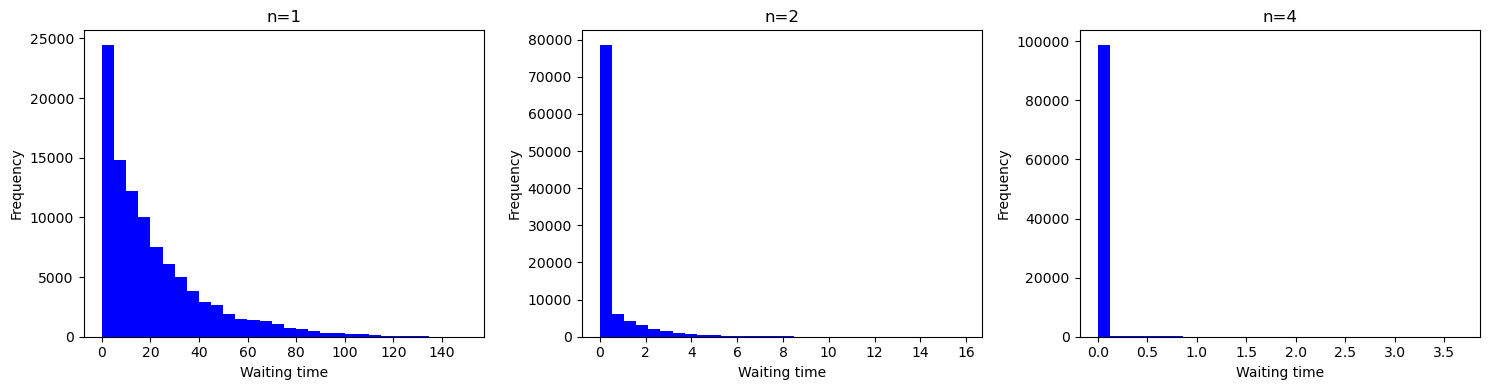

In [46]:
# Creating a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plotting each histogram in a separate subplot
for indx, t in enumerate(waiting_times):
    axs[indx].hist(t, density = False, bins = 30, color= 'b')
    axs[indx].set_title(f"n={ns[indx]}")
    axs[indx].set_xlabel('Waiting time')
    axs[indx].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()

# Display the subplots
plt.show()

In [19]:
lst = ['Aleks', 'Kaya']
print(f"who does the harder question? {random.choice(lst)}!")

who does the harder question? Kaya!


In [ ]:
Ver